## Prova individual de Data Warehouse - 2021.1

## Aluno: Rodrigo Carvalho de Figueiredo

## DRE: 117053497

## Repositório do Github:

# Questão 1 - Coleta de dados

Os arquivos necessários são obtidos diretamente do website do INEP, nos endereços a seguir:

ENADE 2017:

*   https://download.inep.gov.br/microdados/Enade_Microdados/microdados_Enade_2017_portal_2018.10.09.zip

ENADE 2018:

*   https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2018.zip

ENADE 2019:

*   https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2019.zip

Para cada ano, o arquivo contém três pastas:

1.   LEIA-ME: contém os dicionários de variáveis, o manual do usuário e as perguntas do questionário do estudante daquele ano.

2.   INPUTS: contém os arquivos de input para importação dos dados diretamente em ferramentas de análise de dados.

3.   DADOS: contém os dados do ENADE de fato, de todos os estudantes que realizaram o exame naquele ano.

Para obtenção dos dados, são feitos requests HTTP para os endereços do website do INEP que disponibiliza os microdados do ENADE. 

Como os arquivos vem compactados no formato zip, eles são extraídos e então salvos no ambiente do Google Colaboratory (ou na pasta onde estiver sendo executado).

O download dos arquivos pode demorar alguns minutos, a depender da velocidade da conexão entre o servidor do Colab ou máquina que estiver executando o notebook com o website do INEP.

In [ ]:
import requests, zipfile, io

# Download e extração dos arquivos zip

urls = [
  ('2017', 'https://download.inep.gov.br/microdados/Enade_Microdados/microdados_Enade_2017_portal_2018.10.09.zip'),
  ('2018', 'https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2018.zip'),
  ('2019', 'https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2019.zip')
]

for url in urls:
  r = requests.get(url[1])
  z = zipfile.ZipFile(io.BytesIO(r.content))
  z.extractall("/ENADE/" + url[0])
  z.close()

# Questão 2 - Modelo dimensional

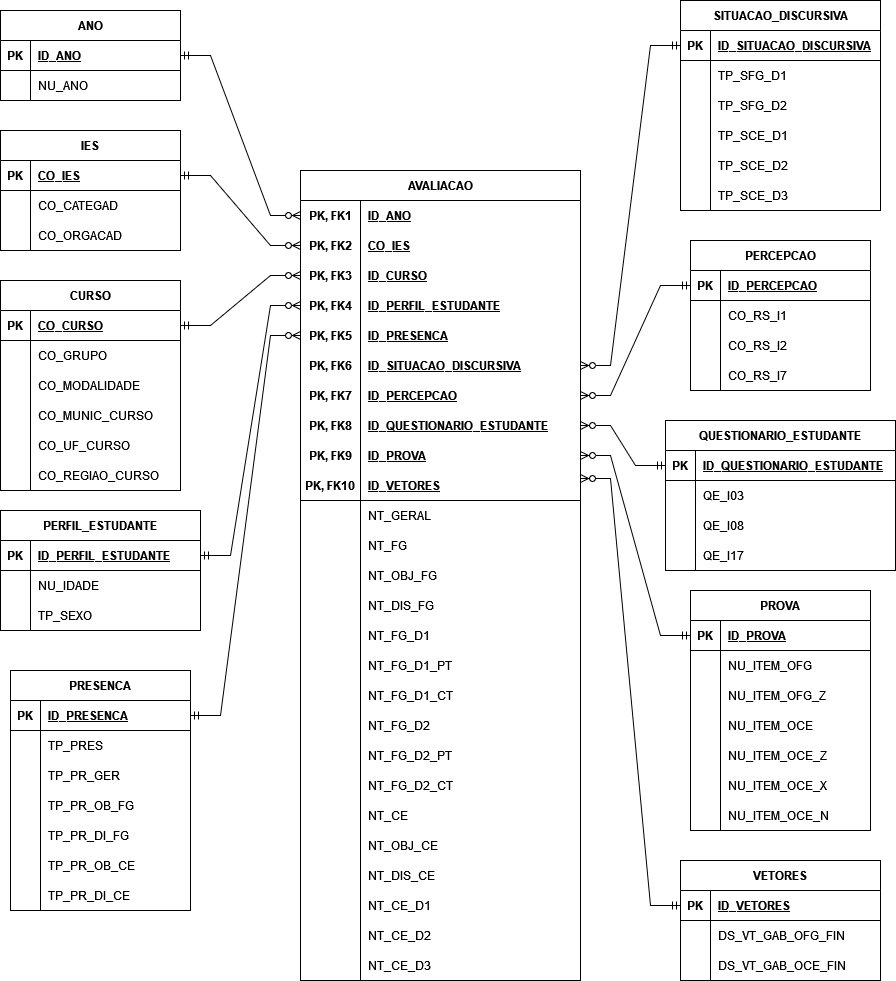

Para análise dos dados foi utilizado o Excel 2016, por meio da importação dos arquivos txt, separados por ' ; '.

Para o desenho do modelo de dados, foi utilizado o website [diagrams.net](https://app.diagrams.net/).



# Questão 3 - Criação da base de dados

In [ ]:
import sqlite3
from sqlalchemy import create_engine

conn = sqlite3.connect('enade.db')

In [ ]:
table_names = ['DADOS_ENADE', 'ANO', 'IES', 'CURSO', 'PERFIL_ESTUDANTE', 'PRESENCA', 'SITUACAO_DISCURSIVA', 'PERCEPCAO', 'QUESTIONARIO_ESTUDANTE' , 'PROVA', 'VETORES', 'AVALIACAO']

for table in table_names:
  conn.execute(''' DROP TABLE IF EXISTS ''' + table)

conn.execute('''
CREATE TABLE IF NOT EXISTS ANO (
   ID_ANO INTEGER PRIMARY KEY NOT NULL,
   NU_ANO INTEGER NOT NULL
 );''')

conn.execute('''
CREATE TABLE IF NOT EXISTS IES (
  CO_IES INTEGER PRIMARY KEY NOT NULL,
  CO_CATEGAD INTEGER NOT NULL,
  CO_ORGACAD INTEGER NOT NULL
);''')

conn.execute('''
CREATE TABLE IF NOT EXISTS CURSO (
  CO_CURSO INTEGER PRIMARY_KEY NOT NULL,
  CO_GRUPO INTEGER NOT NULL,
  CO_MODALIDADE INTEGER NOT NULL,
  CO_MUNIC_CURSO INTEGER NOT NULL,
  CO_UF_CURSO INTEGER NOT NULL,
  CO_REGIAO_CURSO INTEGER NOT NULL
);''')

conn.execute('''
CREATE TABLE IF NOT EXISTS PERFIL_ESTUDANTE (
  ID_PERFIL_ESTUDANTE INTEGER PRIMARY KEY NOT NULL,
  NU_IDADE INTEGER NOT NULL,
  TP_SEXO VARCHAR(1) NOT NULL
);''')

conn.execute('''
CREATE TABLE IF NOT EXISTS PRESENCA (
  ID_PRESENCA INTEGER PRIMARY KEY NOT NULL,
  TP_PRES INTEGER,
  TP_PR_GER INTEGER,
  TP_PR_OB_FG INTEGER,
  TP_PR_DI_FG INTEGER,
  TP_PR_OB_CE INTEGER,
  TP_PR_DI_CE INTEGER
);''')

conn.execute('''
CREATE TABLE IF NOT EXISTS SITUACAO_DISCURSIVA (
  ID_SITUACAO_DISCURSIVA INTEGER PRIMARY KEY NOT NULL,
  TP_SFG_D1 INTEGER,
  TP_SFG_D2 INTEGER,
  TP_SCE_D1 INTEGER,
  TP_SCE_D2 INTEGER,
  TP_SCE_D3 INTEGER
);''')

conn.execute('''
CREATE TABLE IF NOT EXISTS PERCEPCAO (
  ID_PERCEPCAO INTEGER PRIMARY KEY NOT NULL,
  CO_RS_I1 VARCHAR(1),
  CO_RS_I2 VARCHAR(1),
  CO_RS_I7 VARCHAR(1)
);''')

conn.execute('''
CREATE TABLE IF NOT EXISTS QUESTIONARIO_ESTUDANTE (
  ID_QUESTIONARIO_ESTUDANTE INTEGER PRIMARY KEY NOT NULL,
  QE_I03 VARCHAR(1),
  QE_I08 VARCHAR(1),
  QE_I17 VARCHAR(1)
);''')

conn.execute('''
CREATE TABLE IF NOT EXISTS PROVA (
  ID_PROVA INTEGER PRIMARY KEY NOT NULL,
  NU_ITEM_OFG INTEGER NOT NULL,
  NU_ITEM_OFG_Z INTEGER NOT NULL,
  NU_ITEM_OCE INTEGER NOT NULL,
  NU_ITEM_OCE_Z INTEGER NOT NULL,
  NU_ITEM_OCE_X INTEGER NOT NULL,
  NU_ITEM_OCE_N INTEGER NOT NULL
);''')

conn.execute('''
CREATE TABLE IF NOT EXISTS VETORES (
  ID_VETORES INTEGER PRIMARY KEY NOT NULL,
  DS_VT_GAB_OFG_FIN VARCHAR(8),
  DS_VT_GAB_OCE_FIN VARCHAR(27)
);''')

conn.execute('''
CREATE TABLE IF NOT EXISTS AVALIACAO (
  ID_ANO INTEGER NOT NULL REFERENCES ANO(ID_ANO),
  CO_IES INTEGER NOT NULL REFERENCES IES(CO_IES),
  CO_CURSO INTEGER NOT NULL REFERENCES CURSO(CO_CURSO),
  ID_PERFIL_ESTUDANTE INTEGER NOT NULL REFERENCES PERFIL_ESTUDANTE(ID_PERFIL_ESTUDANTE),
  ID_PRESENCA INTEGER NOT NULL REFERENCES PRESENCA(ID_PRESENCA),
  ID_SITUACAO_DISCURSIVA INTEGER NOT NULL REFERENCES SITUACAO_DISCURSIVA(ID_SITUACAO_DISCURSIVA),
  ID_PERCEPCAO INTEGER NOT NULL REFERENCES PERCEPCAO(ID_PERCEPCAO),
  ID_QUESTIONARIO_ESTUDANTE INTEGER NOT NULL REFERENCES QUESTIONARIO_ESTUDANTE(ID_QUESTIONARIO_ESTUDANTE),
  ID_PROVA INTEGER NOT NULL REFERENCES PROVA(ID_PROVA),
  ID_VETORES INTEGER NOT NULL REFERENCES VETORES(ID_VETORES),
  NT_GER INTEGER,
  NT_FG INTEGER,
  NT_OBJ_FG INTEGER,
  NT_DIS_FG INTEGER,
  NT_FG_D1 INTEGER,
  NT_FG_D1_PT INTEGER,
  NT_FG_D1_CT INTEGER,
  NT_FG_D2 INTEGER,
  NT_FG_D2_PT INTEGER,
  NT_FG_D2_CT INTEGER,
  NT_CE INTEGER,
  NT_OBJ_CE INTEGER,
  NT_DIS_CE INTEGER,
  NT_CE_D1 INTEGER,
  NT_CE_D2 INTEGER,
  NT_CE_D3 INTEGER,
  PRIMARY KEY (ID_ANO, CO_IES, CO_CURSO, ID_PERFIL_ESTUDANTE, ID_PRESENCA, ID_SITUACAO_DISCURSIVA, ID_PERCEPCAO, ID_QUESTIONARIO_ESTUDANTE, ID_PROVA, ID_VETORES)
);''');

# Questão 4 - Carga de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
enade_paths = [
'/ENADE/2017/3.DADOS/MICRODADOS_ENADE_2017.txt',
'/ENADE/2018/2018/3.DADOS/microdados_enade_2018.txt',
'/ENADE/2019/3.DADOS/microdados_enade_2019.txt']

ano_cols = ['NU_ANO']
ies_cols = ['CO_IES', 'CO_CATEGAD', 'CO_ORGACAD']
curso_cols = ['CO_CURSO', 'CO_GRUPO', 'CO_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO']
perfil_cols = ['NU_IDADE', 'TP_SEXO']
presenca_cols = ['TP_PRES', 'TP_PR_GER', 'TP_PR_OB_FG', 'TP_PR_DI_FG', 'TP_PR_OB_CE', 'TP_PR_DI_CE']
situacao_cols = ['TP_SFG_D1', 'TP_SFG_D2', 'TP_SCE_D1', 'TP_SCE_D2', 'TP_SCE_D3']
percepcao_cols = ['CO_RS_I1', 'CO_RS_I2', 'CO_RS_I7']
questionario_cols = ['QE_I03', 'QE_I08', 'QE_I17']
prova_cols = ['NU_ITEM_OFG', 'NU_ITEM_OFG_Z', 'NU_ITEM_OCE', 'NU_ITEM_OCE_Z', 'NU_ITEM_OCE_X', 'NU_ITEM_OCE_N']
vetores_cols = ['DS_VT_GAB_OFG_FIN', 'DS_VT_GAB_OCE_FIN']
nota_cols = ['NT_GER','NT_FG','NT_OBJ_FG','NT_DIS_FG','NT_FG_D1','NT_FG_D1_PT','NT_FG_D1_CT','NT_FG_D2','NT_FG_D2_PT','NT_FG_D2_CT','NT_CE','NT_OBJ_CE','NT_DIS_CE','NT_CE_D1','NT_CE_D2','NT_CE_D3']
id_cols = ['ID_ANO', 'CO_IES', 'CO_CURSO', 'ID_PERFIL_ESTUDANTE', 'ID_PRESENCA', 'ID_SITUACAO_DISCURSIVA', 'ID_PERCEPCAO', 'ID_QUESTIONARIO_ESTUDANTE', 'ID_PROVA', 'ID_VETORES']
avaliacao_cols = id_cols + nota_cols
avaliacao_dtype = {key: 'str' for key in nota_cols}

In [ ]:
dados_cols = ano_cols + ies_cols + curso_cols + perfil_cols + presenca_cols + situacao_cols + percepcao_cols + questionario_cols + prova_cols + vetores_cols + nota_cols
dados_dtype = {**avaliacao_dtype}

Carga de dados da tabela DADOS_ENADE, que terá todos os dados do ENADE dos anos de 2017, 2018 e 2019

OBS: a função dataframe.to_sql() do pandas faz a criação da tabela automaticamente a partir do dataframe utilizado

In [ ]:
dados_dfs = []

for path in enade_paths:
  dados_dfs.append(pd.read_csv(path, sep=';', usecols=dados_cols, dtype=dados_dtype))

dados_df = pd.concat(dados_dfs, ignore_index=True)
dados_df.to_sql('DADOS_ENADE', conn, if_exists='append', index = False, chunksize=500000)

Adicionando colunas de surrogate key na tabela DADOS_ENADE

OBS: As tabelas de IES e CURSO já possuem IDs próprios  (CO_IES e CO_CURSO)

In [ ]:
conn.execute('''ALTER TABLE DADOS_ENADE ADD ID_ANO INTEGER''')
conn.execute('''ALTER TABLE DADOS_ENADE ADD ID_PERFIL_ESTUDANTE INTEGER''')
conn.execute('''ALTER TABLE DADOS_ENADE ADD ID_PRESENCA INTEGER''')
conn.execute('''ALTER TABLE DADOS_ENADE ADD ID_SITUACAO_DISCURSIVA INTEGER''')
conn.execute('''ALTER TABLE DADOS_ENADE ADD ID_PERCEPCAO INTEGER''')
conn.execute('''ALTER TABLE DADOS_ENADE ADD ID_QUESTIONARIO_ESTUDANTE INTEGER''')
conn.execute('''ALTER TABLE DADOS_ENADE ADD ID_PROVA INTEGER''')
conn.execute('''ALTER TABLE DADOS_ENADE ADD ID_VETORES INTEGER''')

Carga de dados da tabela dimensão ANO e preenchimento da coluna ID_ANO na tabela DADOS_ENADE

In [ ]:
ano_df = pd.read_sql('''SELECT DISTINCT ''' + ', '.join(ano_cols) + ''' FROM DADOS_ENADE''', conn)
ano_df.to_sql('ANO', conn, if_exists='append', index = False, chunksize = 100000)

Carga de dados da tabela dimensão IES

In [ ]:
ies_df = pd.read_sql('''SELECT DISTINCT ''' + ', '.join(ies_cols) + ''' FROM DADOS_ENADE''', conn).drop_duplicates(subset='CO_IES', keep='last')
ies_df.to_sql('IES', conn, if_exists='append', index = False, chunksize = 100000)

Carga de dados da tabela dimensão CURSO

In [ ]:
curso_df = pd.read_sql('''SELECT DISTINCT ''' + ', '.join(curso_cols) + ''' FROM DADOS_ENADE''', conn).drop_duplicates(subset='CO_CURSO', keep='last')
curso_df.to_sql('CURSO', conn, if_exists='append', index = False, chunksize = 100000)

Carga de dados da tabela dimensão PERFIL_ESTUDANTE

In [ ]:
perfil_df = pd.read_sql('''SELECT DISTINCT ''' + ', '.join(perfil_cols) + ''' FROM DADOS_ENADE''', conn)
perfil_df.to_sql('PERFIL_ESTUDANTE', conn, if_exists='append', index = False, chunksize = 100000)

Carga de dados da tabela dimensão PRESENCA

In [ ]:
presenca_df = pd.read_sql('''SELECT DISTINCT ''' + ', '.join(presenca_cols) + ''' FROM DADOS_ENADE''', conn)
presenca_df.to_sql('PRESENCA', conn, if_exists='append', index = False, chunksize = 100000)

Carga de dados da tabela dimensão SITUACAO_DISCURSIVA

In [ ]:
situacao_df = pd.read_sql('''SELECT DISTINCT ''' + ', '.join(situacao_cols) + ''' FROM DADOS_ENADE''', conn)
situacao_df.to_sql('SITUACAO_DISCURSIVA', conn, if_exists='append', index = False, chunksize = 100000)

Carga de dados da tabela dimensão PERCEPCAO

In [ ]:
percepcao_df = pd.read_sql('''SELECT DISTINCT ''' + ', '.join(percepcao_cols) + ''' FROM DADOS_ENADE''', conn)
percepcao_df.to_sql('PERCEPCAO', conn, if_exists='append', index = False, chunksize = 100000)

Carga de dados da tabela dimensão QUESTIONARIO_ESTUDANTE

In [ ]:
questionario_df = pd.read_sql('''SELECT DISTINCT ''' + ', '.join(questionario_cols) + ''' FROM DADOS_ENADE''', conn)
questionario_df.to_sql('QUESTIONARIO_ESTUDANTE', conn, if_exists='append', index = False, chunksize = 100000)

Carga de dados da tabela dimensão PROVA

In [ ]:
prova_df = pd.read_sql('''SELECT DISTINCT ''' + ', '.join(prova_cols) + ''' FROM DADOS_ENADE''', conn)
prova_df.to_sql('PROVA', conn, if_exists='append', index = False, chunksize = 100000)

Carga de dados da tabela dimensão VETORES

In [ ]:
vetores_df = pd.read_sql('''SELECT DISTINCT ''' + ', '.join(vetores_cols) + ''' FROM DADOS_ENADE''', conn)
vetores_df.to_sql('VETORES', conn, if_exists='append', index = False, chunksize = 100000)

Carga de dados de surrogate keys na tabela DADOS_ENADE

In [ ]:
ano_select = '(SELECT ID_ANO FROM ANO WHERE ' + ' AND '.join('DADOS_ENADE.' + x + ' = ANO.' + x for x in ano_cols) + ')'
perfil_select = '(SELECT ID_PERFIL_ESTUDANTE FROM PERFIL_ESTUDANTE WHERE ' + ' AND '.join('DADOS_ENADE.' + x + ' = PERFIL_ESTUDANTE.' + x for x in perfil_cols) + ')'
presenca_select = '(SELECT ID_PRESENCA FROM PRESENCA WHERE ' + ' AND '.join('DADOS_ENADE.' + x + ' = PRESENCA.' + x for x in presenca_cols) + ')'
situacao_select = '(SELECT ID_SITUACAO_DISCURSIVA FROM SITUACAO_DISCURSIVA WHERE ' + ' AND '.join('DADOS_ENADE.' + x + ' = SITUACAO_DISCURSIVA.' + x for x in situacao_cols) + ')'
percepcao_select = '(SELECT ID_PERCEPCAO FROM PERCEPCAO WHERE ' + ' AND '.join('DADOS_ENADE.' + x + ' = PERCEPCAO.' + x for x in percepcao_cols) + ')'
questionario_select = '(SELECT ID_QUESTIONARIO_ESTUDANTE FROM QUESTIONARIO_ESTUDANTE WHERE ' + ' AND '.join('DADOS_ENADE.' + x + ' = QUESTIONARIO_ESTUDANTE.' + x for x in questionario_cols) + ')'
prova_select = '(SELECT ID_PROVA FROM PROVA WHERE ' + ' AND '.join('DADOS_ENADE.' + x + ' = PROVA.' + x for x in prova_cols) + ')'
vetores_select = '(SELECT ID_VETORES FROM VETORES WHERE ' + ' AND '.join('DADOS_ENADE.' + x + ' = VETORES.' + x for x in vetores_cols) + ')'

In [ ]:
# CERCA DE 2 MINS
conn.execute('UPDATE DADOS_ENADE SET ID_ANO = ' + ano_select + ' WHERE EXISTS ' + ano_select)
conn.execute('UPDATE DADOS_ENADE SET ID_PERFIL_ESTUDANTE = ' + perfil_select + ' WHERE EXISTS ' + perfil_select)
conn.execute('UPDATE DADOS_ENADE SET ID_PRESENCA = ' + presenca_select + ' WHERE EXISTS ' + presenca_select)
conn.execute('UPDATE DADOS_ENADE SET ID_SITUACAO_DISCURSIVA = ' + situacao_select + ' WHERE EXISTS ' + situacao_select)
conn.execute('UPDATE DADOS_ENADE SET ID_PERCEPCAO = ' + percepcao_select + ' WHERE EXISTS ' + percepcao_select)
conn.execute('UPDATE DADOS_ENADE SET ID_QUESTIONARIO_ESTUDANTE = ' + questionario_select + ' WHERE EXISTS ' + questionario_select)
conn.execute('UPDATE DADOS_ENADE SET ID_PROVA = ' + prova_select + ' WHERE EXISTS ' + prova_select)
conn.execute('UPDATE DADOS_ENADE SET ID_VETORES = ' + vetores_select + ' WHERE EXISTS ' + vetores_select)
conn.commit()

Carga de dados da tabela fato AVALIACAO

In [ ]:
# CERCA DE 1 MIN
avaliacao_df = pd.read_sql('SELECT DISTINCT ' + ', '.join(avaliacao_cols) + ' FROM DADOS_ENADE WHERE ' + ' AND '.join(x + ' IS NOT NULL' for x in id_cols), conn).drop_duplicates(id_cols)
avaliacao_df.to_sql('AVALIACAO', conn, if_exists='append', index = False, chunksize = 500000)

# Questão 5 - Análise de dados

### Pergunta 1 - Qual a média de nota, por ano, de todos os estudantes participantes do ENADE?

In [ ]:
q_1 = pd.read_sql('''
SELECT 
  ANO.NU_ANO as Ano, 
  AVG(NT_GER) AS Total,
  AVG(NT_FG) AS [Formação Geral],
  AVG(NT_CE) AS [Componente Específico]
FROM AVALIACAO JOIN ANO ON AVALIACAO.ID_ANO = ANO.ID_ANO 
GROUP BY AVALIACAO.ID_ANO''', conn)

q_1

In [ ]:
ax_1 = q_1.plot.bar(x='Ano')
ax_1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax_1.set_xlabel('Ano')
ax_1.set_ylabel('Médias')
ax_1.set_title('Média de notas ENADE');

### Pergunta 2 - Há alguma diferença nos resultados dos estudantes que participaram do ENADE nesses 3 anos em função da sua renda familiar (em salários mínimos)?

In [ ]:
q_2 = pd.read_sql('''
SELECT 
  ANO.NU_ANO as Ano,
  CASE 
    WHEN QUESTIONARIO_ESTUDANTE.QE_I08 = 'A' THEN 'Até 1,5 SM'
    WHEN QUESTIONARIO_ESTUDANTE.QE_I08 = 'B' THEN '1,5 - 3 SM'
    WHEN QUESTIONARIO_ESTUDANTE.QE_I08 = 'C' THEN '3 - 4,5 SM'
    WHEN QUESTIONARIO_ESTUDANTE.QE_I08 = 'D' THEN '4,5 - 6 SM'
    WHEN QUESTIONARIO_ESTUDANTE.QE_I08 = 'E' THEN '6 - 10 SM'
    WHEN QUESTIONARIO_ESTUDANTE.QE_I08 = 'F' THEN '10 - 30 SM'
    WHEN QUESTIONARIO_ESTUDANTE.QE_I08 = 'G' THEN '+ de 30 SM' END AS [Renda Familiar],
  AVG(NT_GER) AS Total,
  AVG(NT_FG) AS [Formação Geral],
  AVG(NT_CE) AS [Componente Específico]
FROM AVALIACAO 
JOIN ANO ON AVALIACAO.ID_ANO = ANO.ID_ANO
JOIN QUESTIONARIO_ESTUDANTE ON AVALIACAO.ID_QUESTIONARIO_ESTUDANTE = QUESTIONARIO_ESTUDANTE.ID_QUESTIONARIO_ESTUDANTE
GROUP BY ANO.NU_ANO, QUESTIONARIO_ESTUDANTE.QE_I08''', conn).dropna(axis='rows')

q_2

In [ ]:
q_21 = q_2.loc[q_2['Ano'] == 2017][['Renda Familiar', 'Total', 'Formação Geral', 'Componente Específico']]
q_22 = q_2.loc[q_2['Ano'] == 2018][['Renda Familiar', 'Total', 'Formação Geral', 'Componente Específico']]
q_23 = q_2.loc[q_2['Ano'] == 2019][['Renda Familiar', 'Total', 'Formação Geral', 'Componente Específico']]

figure, axes = plt.subplots(1, 3)

ax_21 = q_21.plot.bar(ax=axes[0], x='Renda Familiar', figsize=(20, 5))
ax_21.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax_21.set_xlabel('Renda Familiar')
ax_21.set_ylabel('Médias')
ax_21.set_title('Média de notas do ENADE 2017 por renda familiar')

ax_22 = q_22.plot.bar(ax=axes[1], x='Renda Familiar', figsize=(20, 5))
ax_22.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax_22.set_xlabel('Renda Familiar')
ax_22.set_ylabel('Médias')
ax_22.set_title('Média de notas do ENADE 2018 por renda familiar')

ax_23 = q_23.plot.bar(ax=axes[2], x='Renda Familiar', figsize=(20, 5))
ax_23.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax_23.set_xlabel('Renda Familiar')
ax_23.set_ylabel('Médias')
ax_23.set_title('Média de notas do ENADE 2019 por renda familiar')

plt.tight_layout();

Percebe-se que, nos 3 anos, todas as médias crescem de acordo com a renda familiar dos estudantes. 

### Pergunta 3 - Como foi a média de notas dos estudantes de Ciência da Computação (Bacharelado) em 2017, comparado à média geral nesse mesmo ano?

In [ ]:
q_3 = pd.read_sql('''
SELECT 
  'BCC' AS Grupo,
  AVG(NT_GER) AS Total,
  AVG(NT_FG) AS [Formação Geral],
  AVG(NT_CE) AS [Componente Específico]
FROM AVALIACAO 
JOIN ANO ON AVALIACAO.ID_ANO = ANO.ID_ANO
JOIN CURSO ON AVALIACAO.CO_CURSO = CURSO.CO_CURSO
WHERE ANO.NU_ANO = 2017 AND CURSO.CO_GRUPO = 4004
UNION ALL
SELECT 
  'Geral' AS Grupo,
  AVG(NT_GER) AS Total,
  AVG(NT_FG) AS [Formação Geral],
  AVG(NT_CE) AS [Componente Específico]
FROM AVALIACAO 
JOIN ANO ON AVALIACAO.ID_ANO = ANO.ID_ANO
WHERE ANO.NU_ANO = 2017
''', conn)

q_3

In [ ]:
ax_3 = q_3.plot.bar(x='Grupo')
ax_3.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax_3.set_xlabel('Grupo')
ax_3.set_ylabel('Médias')
ax_3.set_title('Média de notas ENADE 2017 (BCC x Geral)');

As notas dos estudantes de BCC, no ENADE 2017, foram bem parecidas com as notas em geral.

A componente específica foi um pouco menor para o BCC, porém a formação geral foi um pouco maior, o que equilibrou bastante a média total dos dois casos.

### Pergunta 4 - Como foi a média de notas dos estudantes do curso de Bacharelado em Ciência da Computação da UFRJ em comparação com a nota geral dos estudantes de Ciência da Computação (Bacharelado) no ENADE 2017?

In [ ]:
q_4 = pd.read_sql('''
SELECT 
  'BCC UFRJ' AS Curso,
  AVG(NT_GER) AS Total,
  AVG(NT_FG) AS [Formação Geral],
  AVG(NT_CE) AS [Componente Específico]
FROM AVALIACAO 
JOIN ANO ON AVALIACAO.ID_ANO = ANO.ID_ANO
JOIN CURSO ON AVALIACAO.CO_CURSO = CURSO.CO_CURSO
WHERE ANO.NU_ANO = 2017 AND CURSO.CO_GRUPO = 4004 AND CURSO.CO_CURSO = 85783
UNION ALL
SELECT 
  'BCC Geral' AS Curso,
  AVG(NT_GER) AS Total,
  AVG(NT_FG) AS [Formação Geral],
  AVG(NT_CE) AS [Componente Específico]
FROM AVALIACAO 
JOIN ANO ON AVALIACAO.ID_ANO = ANO.ID_ANO
JOIN CURSO ON AVALIACAO.CO_CURSO = CURSO.CO_CURSO
WHERE ANO.NU_ANO = 2017 AND CURSO.CO_GRUPO = 4004
''', conn)

q_4

In [ ]:
ax_4 = q_4.plot.bar(x='Curso')
ax_4.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax_4.set_xlabel('Curso')
ax_4.set_ylabel('Médias')
ax_4.set_title('Média de notas ENADE 2017 (BCC UFRJ x BCC Geral)');

As médias dos estudantes do curso de BCC da UFRJ tiveram notas significativamente maiores do que a média geral dos cursos de Bacharelado em Ciência da Computação.

Isso se deu, principalmente, pela maior nota no componente específico, que tem um peso maior no cálculo da média total.

### Pergunta 5 - Existe alguma diferença significativa entre a médias das notas do estudantes de cursos de modalidade EaD, quando comparadas às médias de estudantes de cursos presenciais, nesses 3 anos?

In [ ]:
q_5 = pd.read_sql('''
SELECT 
  ANO.NU_ANO AS Ano,
  CASE 
    WHEN CURSO.CO_MODALIDADE = 0 AND ANO.NU_ANO <> 2018 THEN 'EaD'
    WHEN CURSO.CO_MODALIDADE = 1 AND ANO.NU_ANO <> 2018 THEN 'Presencial'
    WHEN CURSO.CO_MODALIDADE = 2 AND ANO.NU_ANO = 2018 THEN 'EaD'
    WHEN CURSO.CO_MODALIDADE = 1 AND ANO.NU_ANO = 2018 THEN 'Presencial' END AS Modalidade,
  AVG(NT_GER) AS Total,
  AVG(NT_FG) AS [Formação Geral],
  AVG(NT_CE) AS [Componente Específico]
FROM AVALIACAO 
JOIN ANO ON AVALIACAO.ID_ANO = ANO.ID_ANO
JOIN CURSO ON AVALIACAO.CO_CURSO = CURSO.CO_CURSO
GROUP BY ANO.ID_ANO, CURSO.CO_MODALIDADE
''', conn)

q_5

,Ano,Modalidade,Total,Formação Geral,Componente Específico
0,2017,EaD,40.139638,46.480834,38.015180
1,2017,Presencial,43.849561,52.139329,41.083368
2,2018,Presencial,42.116843,46.309610,40.706933
3,2018,EaD,37.476309,40.517564,36.464055
4,2019,EaD,37.227308,31.432557,39.138189
5,2019,Presencial,43.824660,39.714791,45.186393


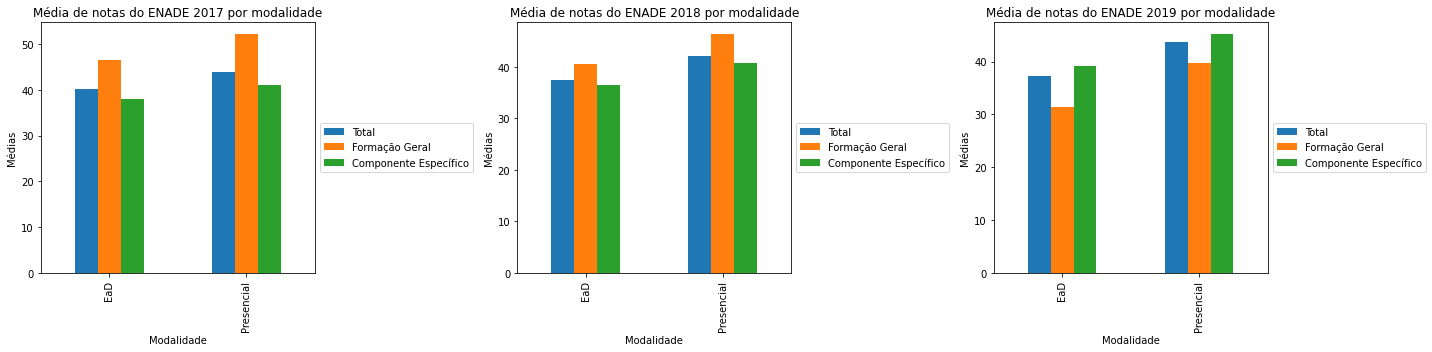

In [ ]:
q_51 = q_5.loc[q_5['Ano'] == 2017][['Modalidade', 'Total', 'Formação Geral', 'Componente Específico']]
q_52 = q_5.loc[q_5['Ano'] == 2018][['Modalidade', 'Total', 'Formação Geral', 'Componente Específico']].reindex([3,2])
q_53 = q_5.loc[q_5['Ano'] == 2019][['Modalidade', 'Total', 'Formação Geral', 'Componente Específico']]

figure, axes = plt.subplots(1, 3)

ax_51 = q_51.plot.bar(ax=axes[0], x='Modalidade', figsize=(20, 5))
ax_51.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax_51.set_xlabel('Modalidade')
ax_51.set_ylabel('Médias')
ax_51.set_title('Média de notas do ENADE 2017 por modalidade')

ax_52 = q_52.plot.bar(ax=axes[1], x='Modalidade', figsize=(20, 5))
ax_52.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax_52.set_xlabel('Modalidade')
ax_52.set_ylabel('Médias')
ax_52.set_title('Média de notas do ENADE 2018 por modalidade')

ax_53 = q_53.plot.bar(ax=axes[2], x='Modalidade', figsize=(20, 5))
ax_53.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax_53.set_xlabel('Modalidade')
ax_53.set_ylabel('Médias')
ax_53.set_title('Média de notas do ENADE 2019 por modalidade')

plt.tight_layout();

Percebe-se que os estudantes de modalidade presencial apresentaram, nos 3 anos analisados, maiores médias em comparação aos estudantes de modalidade de educação à distância (EaD).

Essa diferença, no entanto, não foi tão significativa, como mostram os gráficos.

# Questão 6 - Aprendizado a partir dos dados

O Objetivo desse aprendizado é predizer a faixa de nota de um estudante ao prestar o ENADE, com base na modalidade de ensino do ensino médio, faixa de renda familiar e tipo de escola em que cursou o ensino médio. Esses atributos estão divididos da seguinte forma:

**Modalidade de ensino no ensino médio**:

*   EaD
*   Presencial

**Renda familiar:**

*   Até 1,5 salários mínimos
*   De 1,5 a 3 salários mínimos
*   De 3 a 4,5 salários mínimos
*   De 4,5 a 6 salários mínimos
*   De 6 a 10 salários mínimos
*   De 10 a 30 salários mínimos
*   Acima de 30 salários mínimos

**Tipo de escola em que cursou o ensino médio:**

*   Todo em escola pública
*   Todo em escola privada (particular)
*   Todo no exterior
*   A maior parte em escola pública
*   A maior parte em escola privada (particular)
*   Parte no Brasil e parte no exterior

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [ ]:
# Seleciona os dados relevantes e grava em um dataframe

data = pd.read_sql('''
SELECT
CASE
  WHEN CURSO.CO_MODALIDADE = 0 AND ANO.NU_ANO <> 2018 THEN 'EaD'
  WHEN CURSO.CO_MODALIDADE = 1 AND ANO.NU_ANO <> 2018 THEN 'Presencial'
  WHEN CURSO.CO_MODALIDADE = 2 AND ANO.NU_ANO = 2018 THEN 'EaD'
  WHEN CURSO.CO_MODALIDADE = 1 AND ANO.NU_ANO = 2018 THEN 'Presencial' END AS Modalidade,
QUESTIONARIO_ESTUDANTE.QE_I08 AS [Renda Familiar],
QUESTIONARIO_ESTUDANTE.QE_I17 AS [Tipo de escola],
CAST(REPLACE(AVALIACAO.NT_GER, ',', '.') AS REAL) AS Nota
FROM AVALIACAO
JOIN ANO ON AVALIACAO.ID_ANO = ANO.ID_ANO
JOIN CURSO ON AVALIACAO.CO_CURSO = CURSO.CO_CURSO
JOIN PERFIL_ESTUDANTE ON AVALIACAO.ID_PERFIL_ESTUDANTE = PERFIL_ESTUDANTE.ID_PERFIL_ESTUDANTE
JOIN QUESTIONARIO_ESTUDANTE ON AVALIACAO.ID_QUESTIONARIO_ESTUDANTE = QUESTIONARIO_ESTUDANTE.ID_QUESTIONARIO_ESTUDANTE
''', conn).replace(' ', np.nan).dropna()

conn.close()
data.head()

,Modalidade,Renda Familiar,Tipo de escola,Nota
0,Presencial,B,B,52.6
1,Presencial,B,A,63.1
2,Presencial,F,B,33.7
3,Presencial,B,A,58.1
4,Presencial,F,B,46.3


In [ ]:
# Transforma as notas numéricas em diferentes classes de nota, para poder classificar depois:
# Classe A: nota >= 0.75 * maior_nota
# Classe B: 0.75 * maior_nota <= nota < 0.25 * maior_nota
# Classe C: nota <= 0.25 * maior_nota

def classifica_notas(df):

  notas = []

  maior_nota = df['Nota'].max();

  for row in df['Nota']:
      if row >= (0.75 * maior_nota):
          notas.append('A')
      elif row >= (0.25 * maior_nota):
          notas.append('B')  
      else:
          notas.append('C')

  df['Nota'] = notas
  return df

data = classifica_notas(data)
data

,Modalidade,Renda Familiar,Tipo de escola,Nota
0,Presencial,B,B,B
1,Presencial,B,A,B
2,Presencial,F,B,B
3,Presencial,B,A,B
4,Presencial,F,B,B
...,...,...,...,...
1314177,Presencial,E,A,A
1314178,Presencial,E,B,B
1314179,Presencial,A,A,B
1314180,Presencial,B,E,B


In [ ]:
# Formata os dados transformando todas as colunas, com exceção da nota em colunas separadas para cada classe 
# de cada coluna do dataframe original, para que seja possível treinar um classificador

def format_data(df):

  category_df = df.loc[:, df.columns != 'Nota']
  dummy_df = pd.get_dummies(category_df)
  modified_df = pd.concat([dummy_df, df['Nota']], axis='columns')

  return modified_df

modified_data = format_data(data)
modified_data.head()

,Modalidade_EaD,Modalidade_Presencial,Renda Familiar_A,Renda Familiar_B,Renda Familiar_C,Renda Familiar_D,Renda Familiar_E,Renda Familiar_F,Renda Familiar_G,Tipo de escola_A,Tipo de escola_B,Tipo de escola_C,Tipo de escola_D,Tipo de escola_E,Tipo de escola_F,Nota
0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,B
1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,B
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,B
3,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,B
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,B


In [ ]:
# Divide os dados em dados de treino (70%) e de teste (30%)

def get_train_test_split(df):

  labels = data['Nota']
  df = df.loc[:, df.columns != 'Nota']

  return train_test_split(df, labels, test_size=0.15)

x_train, x_test, y_train, y_test = get_train_test_split(modified_data)

### Classificação por árvore de decisão

In [ ]:
# Cria o classificador e treina com base nos dados de treino
dt = DecisionTreeClassifier()
dtfit = dt.fit(x_train, y_train)

In [ ]:
# Gera a lista de predições de notas com base nos dados de teste
dt_pred = dtfit.predict(x_test)
dt_pred

array(['B', 'B', 'B', ..., 'B', 'B', 'B'], dtype=object)

In [ ]:
# Acurácia e Precisão
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred, average='weighted'))

Accuracy: 0.8857159551468987
Precision: 0.7844927532017831


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Classificação por Nayve Bayes Multinomial

In [ ]:
# Cria o classificador e treina com base nos dados de treino
nb = MultinomialNB()
nbfit = dt.fit(x_train, y_train)

In [ ]:
# Gera a lista de predições de notas com base nos dados de teste
nb_pred = dtfit.predict(x_test)
nb_pred

array(['B', 'B', 'B', ..., 'B', 'B', 'B'], dtype=object)

In [ ]:
# Acurácia e Precisão
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred, average='weighted'))

Accuracy: 0.8857159551468987
Precision: 0.7844927532017831


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Questão 7 - Ferramentas utilizadas

Foram utilizadas as seguintes ferramentas:

*   [Google Colaboratory](https://colab.research.google.com/): ferramenta de desenvolvimento online que permite execução remota do código em um notebook python, similar ao Jupyter Notebook. Escolhido pela facilidade de rodar o código e comodidade de salvar o código em nuvem.

*   [SQLite](https://www.sqlite.org/index.html): banco de dados relacional extremamente leve, ideal para aplicações pequenas. Escolhido pela integração facilitada com o Google Colaboratory e pela familiaridade com a ferramenta.

*   [Pandas](https://pandas.pydata.org/): biblioteca do Python para criação de dataframes e análise de dados. Escolhido pela familiaridade com a ferramenta, pela facilidade de trabalhar com os dataframes e pela fácil integração com o SQLite.

*   [Sklearn](https://scikit-learn.org/stable/): biblioteca do Python para criação e treinamento de modelos de aprendizado de máquina. Escolhido pela facilidade de uso e pela imensa coleção de modelos disponíveis para uso.





